In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv('COVID19_state.csv')

In [17]:
data.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


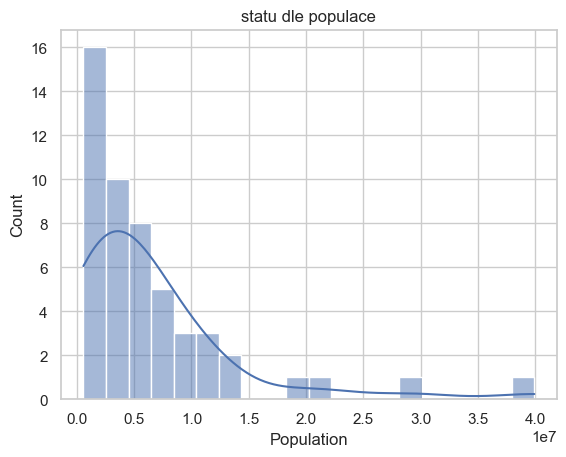

In [103]:
sns.histplot(data['Population'], bins=20, kde= True)
plt.title('statu dle populace')

#plt.savefig('PopbyStates.png', bbox_inches='tight', pad_inches=0)


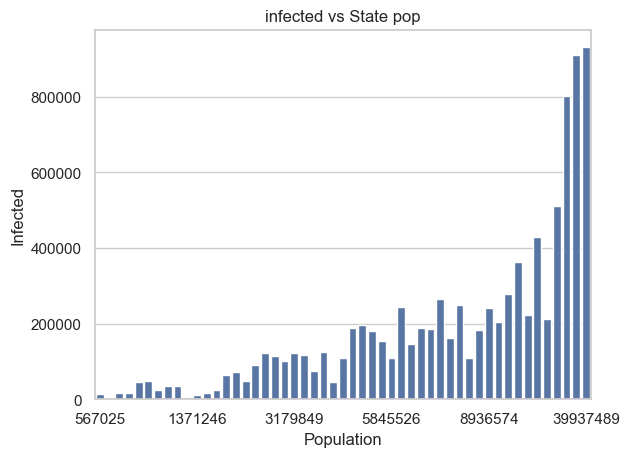

In [106]:
graf = sns.barplot(x='Population', y='Infected',data=data)
for ind, label in enumerate(graf.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title('infected vs State pop')
#plt.savefig('InfectedvsStatePop.png', bbox_inches='tight', pad_inches=0)
plt.show()

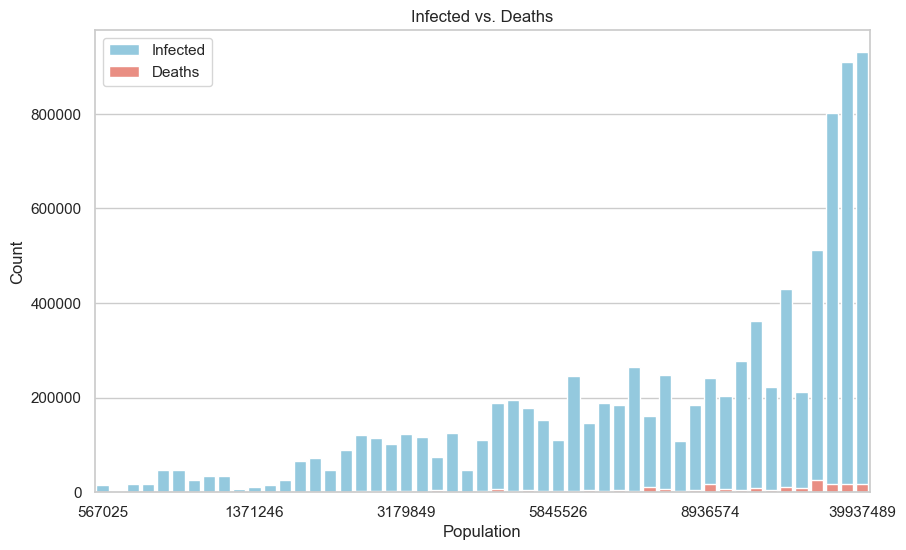

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

graf =sns.barplot(x='Population', y='Infected', data=data, color='skyblue', label='Infected')
sns.barplot(x='Population', y='Deaths', data=data, color='salmon', label='Deaths')

for ind, label in enumerate(graf.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title('Infected vs. Deaths')
plt.xlabel('Population')
plt.ylabel('Count')
plt.legend()
#plt.savefig('InfvsDeaths.png', bbox_inches='tight', pad_inches=0)
plt.show()

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_5720\3751677465.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  for ind, label in enumerate(graf.set_xticklabels(graf.get_xticklabels(), rotation = 90)):


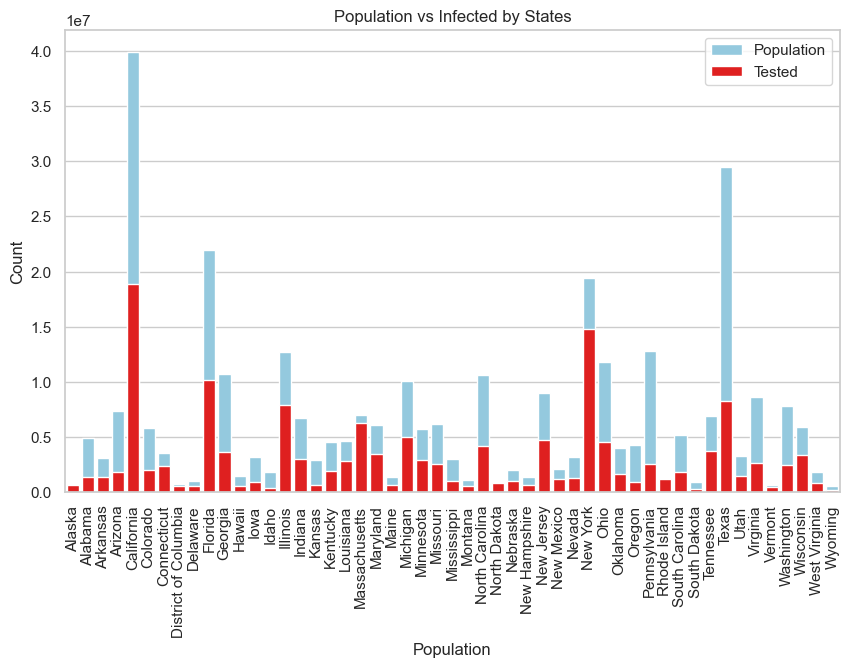

In [104]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

graf = sns.barplot(x='State', y='Population', data=data, color='skyblue', label='Population')
sns.barplot(x='State', y='Tested', data=data, color='red', label='Tested')


for ind, label in enumerate(graf.set_xticklabels(graf.get_xticklabels(), rotation = 90)):
    label.set_visible(True)


plt.title('Population vs Infected by States')
plt.xlabel('Population')
plt.ylabel('Count')
plt.legend()
#plt.savefig('InfvsPop.png', bbox_inches='tight', pad_inches=0)
plt.show()


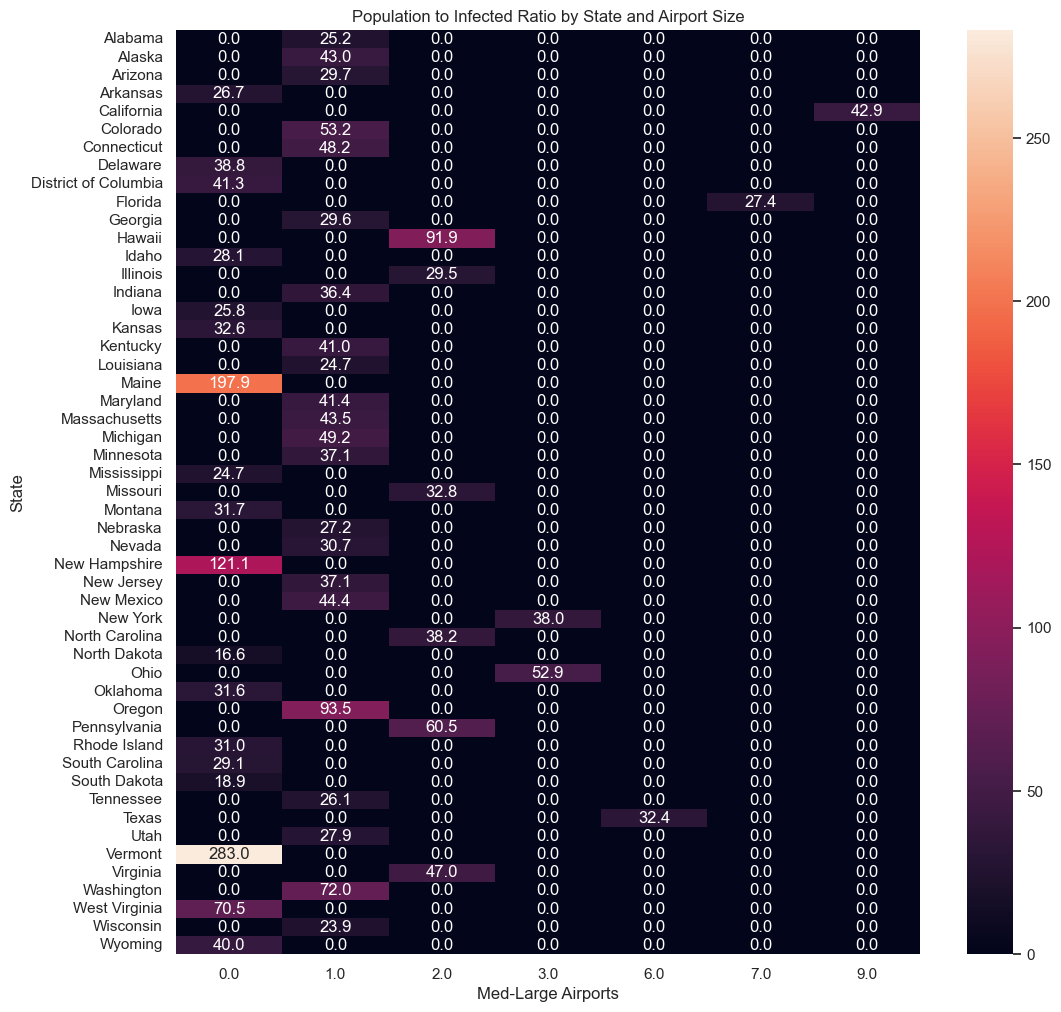

In [88]:
data['Pop_Inf_Coef'] = data['Population'] / data['Infected']
plt.figure(figsize=(12, 12))
#tvorba matice z hlediska poctu nakazenych na pocet letist, cim nizsi cislo, tím více nakažených v oblasti bylo
Inf_to_Airport = data.pivot_table(index='State',columns='Med-Large Airports',values='Pop_Inf_Coef')
Inf_to_Airport.fillna(0,inplace=True)
#matrix.head()
sns.heatmap(Inf_to_Airport, annot=True, fmt='.1f')

plt.title('Population to Infected Ratio by State and Airport Size')
#plt.savefig('Inf_to_Airport.png', bbox_inches='tight', pad_inches=0)